<h1>Eurovisión 2019<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivación" data-toc-modified-id="Motivación-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivación</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Carga-y-limpieza-de-los-datos" data-toc-modified-id="Carga-y-limpieza-de-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Carga y limpieza de los datos</a></span><ul class="toc-item"><li><span><a href="#Histórico-de-votaciones" data-toc-modified-id="Histórico-de-votaciones-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Histórico de votaciones</a></span></li><li><span><a href="#Países-participantes-en-2019" data-toc-modified-id="Países-participantes-en-2019-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Países participantes en 2019</a></span></li></ul></li><li><span><a href="#Análisis-de-un-país-en-particular" data-toc-modified-id="Análisis-de-un-país-en-particular-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Análisis de un país en particular</a></span><ul class="toc-item"><li><span><a href="#Puntuaciones-finales-en-todas-las-ediciones" data-toc-modified-id="Puntuaciones-finales-en-todas-las-ediciones-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Puntuaciones finales en todas las ediciones</a></span></li><li><span><a href="#Puntuaciones-recibidas,-detalladas-por-país" data-toc-modified-id="Puntuaciones-recibidas,-detalladas-por-país-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Puntuaciones recibidas, detalladas por país</a></span></li><li><span><a href="#Puntuaciones-emitidas-a-los-demás-países" data-toc-modified-id="Puntuaciones-emitidas-a-los-demás-países-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Puntuaciones emitidas a los demás países</a></span></li></ul></li><li><span><a href="#Matrices-de-puntuación" data-toc-modified-id="Matrices-de-puntuación-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matrices de puntuación</a></span><ul class="toc-item"><li><span><a href="#Matriz-con-voto-histórico-(1975---2018)" data-toc-modified-id="Matriz-con-voto-histórico-(1975---2018)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Matriz con voto histórico (1975 - 2018)</a></span></li><li><span><a href="#Matriz-con-televoto-obligatorio-(2001-2018)" data-toc-modified-id="Matriz-con-televoto-obligatorio-(2001-2018)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Matriz con televoto obligatorio (2001-2018)</a></span></li><li><span><a href="#Matriz-con-voto-exclusivo-del-público-(2016---2018)" data-toc-modified-id="Matriz-con-voto-exclusivo-del-público-(2016---2018)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Matriz con voto exclusivo del público (2016 - 2018)</a></span></li></ul></li><li><span><a href="#Metajuego" data-toc-modified-id="Metajuego-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Metajuego</a></span><ul class="toc-item"><li><span><a href="#Quien-tiene-un-vecino-tiene-un-tesoro" data-toc-modified-id="Quien-tiene-un-vecino-tiene-un-tesoro-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Quien tiene un vecino tiene un tesoro</a></span></li><li><span><a href="#El-efecto-diáspora" data-toc-modified-id="El-efecto-diáspora-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>El efecto diáspora</a></span></li></ul></li></ul></div>

# Motivación

Estás viendo la final de Eurovisión, acaban las actuaciones, y llega la parte más divertida: el momento *douze points*. Si eres fan de Eurovisión recordarás como el comentarista de la gala (el gran Uribarri) acertaba muchas de las puntuaciones de cualquier país (*"... y los 12 seguro que van para Rusia!"*). ¿Cómo es posible? ¿tan previsible puede llegar a ser? Vamos a intentar analizarlo en este notebook :)

Nuestro cometido no va a ser sencillo por varias razones:
* Los países participantes han ido variando debido a conflictos, separaciones, invitaciones, la pertenencia a la Unión Europea de Radiodifusión, etc.
* Desde 1975 se usa el sistema de puntuación actual (por eso no están los datos anteriores).
* Las notas otorgadas por cada país comenzaron siendo decididas por un jurado. En 1997 se introdujo el televoto en algunos países, y se empezó a aplicar de manera desigual. Desde 2016 se computa el voto del jurado y el del público por separado en todos los países (algo muy reciente, por lo que tenemos pocas muestras para lanzarnos a por una predicción). 
* A partir de 2004 se introdujeron las semifinales para decidir quiénes participaban en la gran final; algo que también supone un problema añadido.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from scipy.cluster import hierarchy as hc

In [3]:
%matplotlib inline
sns.set()

# Carga y limpieza de los datos

## Histórico de votaciones

Contamos con los datos de todas las puntuaciones realizadas entre 1975 y 2018, recopiladas por Datagraver.com y disponibles en [data.world](https://data.world/datagraver/eurovision-song-contest-scores-1975-2018). Una vez los tengamos descargados procedemos a cargarlos en un dataframe de Pandas:

In [4]:
eurovision_xls = f'data/eurovision_song_contest_1975_2018v2.xlsx'
df = pd.read_excel(eurovision_xls)

In [5]:
df.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN


In [6]:
df.set_axis(['year', 'round', 'edition', 'voters', 'from_country', 'to_country', 'points', 'duplicate'], 
            axis='columns', inplace=True)
df.tail()

,year,round,edition,voters,from_country,to_country,points,duplicate
46377,2018,sf2,2018sf2,T,Ukraine,Serbia,0,NaN
46378,2018,sf2,2018sf2,T,Ukraine,Slovenia,6,NaN
46379,2018,sf2,2018sf2,T,Ukraine,Sweden,4,NaN
46380,2018,sf2,2018sf2,T,Ukraine,The Netherlands,0,NaN
46381,2018,sf2,2018sf2,T,Ukraine,Ukraine,0,NaN


Vemos qué tiene la columna duplicate:

In [7]:
print(df['duplicate'].unique())

['x' nan]


In [8]:
df.query('duplicate == "x"').head()

,year,round,edition,voters,from_country,to_country,points,duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
20,1975,f,1975f,J,Finland,Finland,0,x
40,1975,f,1975f,J,France,France,0,x
60,1975,f,1975f,J,Germany,Germany,0,x
80,1975,f,1975f,J,Ireland,Ireland,0,x


Eliminamos todas las filas duplicadas:

In [9]:
df.query('duplicate != "x"', inplace=True)

Eliminamos las columnas que no aportan nada:

In [10]:
df.drop(columns=['edition', 'duplicate']);

Vemos todos los países participantes a lo largo de los años:

In [11]:
print(sorted(df['from_country'].unique()))

['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Morocco', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherands', 'The Netherlands', 'Turkey', 'Ukraine', 'United Kingdom', 'Yugoslavia']


Arreglamos errores y unificamos:

In [12]:
df.replace(to_replace=['The Netherands'], value='The Netherlands', inplace=True)
df.replace(to_replace=['Macedonia'], value='North Macedonia', inplace=True)
df.replace(to_replace=['F.Y.R. Macedonia'], value='North Macedonia', inplace=True)

## Países participantes en 2019

Necesitamos la lista de países participantes en esta edición, así como la lista de finalistas:

In [13]:
countries_2019 = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 
                  'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
                  'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 
                  'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 
                  'Montenegro', 'The Netherlands', 'North Macedonia', 'Norway', 'Poland', 
                  'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 
                  'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

In [14]:
finalists_2019 = ['Albania', 'Australia', 'Azerbaijan', 'Belarus', 'Cyprus', 'Czech Republic', 
                  'Denmark', 'Estonia', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 
                  'Italy', 'Malta', 'The Netherlands', 'North Macedonia', 'Norway', 'Russia', 
                  'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

# Análisis de un país en particular

## Puntuaciones finales en todas las ediciones 

Puntuaciones finales recibidas por un país a lo largo de todas las ediciones (a partir de 2016 se distingue entre Jurado y Televoto):

In [15]:
df.query('to_country == "Spain"').groupby(['year', 'round', 'voters'])['points'].sum()

year  round  voters
1975  f      J          53
1976  f      J          11
1977  f      J          52
1978  f      J          65
1979  f      J         116
1980  f      J          38
1981  f      J          38
1982  f      J          52
1983  f      J           0
1984  f      J         106
1985  f      J          36
1986  f      J          51
1987  f      J          10
1988  f      J          58
1989  f      J          88
1990  f      J          96
1991  f      J         119
1992  f      J          37
1993  f      J          58
1994  f      J          17
1995  f      J         119
1996  f      J          17
1997  f      J          96
1998  f      J          21
1999  f      J           1
2000  f      J          18
2001  f      J          76
2002  f      J          81
2003  f      J          81
2004  f      J          87
2005  f      J          28
2006  f      J          18
2007  f      J          43
2008  f      J          55
2009  f      J          23
2010  f      J          68
2011  f 

## Puntuaciones recibidas, detalladas por país

Cómo votan todos los países a uno en particular, ordenados de más a menos generosos:

In [16]:
df.query('to_country == "Spain"').groupby('from_country')['points'] \
        .aggregate([sum, 'count', max, np.mean]) \
        .sort_values(by=['mean', 'count'], ascending=False)

,sum,count,max,mean
from_country,,,,
Andorra,60,6,12,10.000000
Morocco,5,1,5,5.000000
Portugal,172,42,12,4.095238
Switzerland,153,43,12,3.558140
Luxembourg,67,19,10,3.526316
Turkey,118,34,12,3.470588
Italy,95,28,12,3.392857
Greece,137,41,10,3.341463
Cyprus,119,38,12,3.131579


Nos fijamos sólo en el televoto, desde que se computa por separado:

In [17]:
df.query('to_country == "Spain" and voters == "T"').groupby('from_country')['points'] \
        .aggregate([sum, 'count', max, np.mean]) \
        .sort_values(by=['mean', 'count'], ascending=False)

,sum,count,max,mean
from_country,,,,
Portugal,17,2,12,8.500000
France,6,3,5,2.000000
United Kingdom,4,3,4,1.333333
Switzerland,3,3,2,1.000000
Australia,2,3,2,0.666667
Sweden,1,3,1,0.333333
Albania,0,3,0,0.000000
Armenia,0,3,0,0.000000
Austria,0,3,0,0.000000


## Puntuaciones emitidas a los demás países

Cómo vota un país a todos los demás, ordenados de más a menos *amigos*:

In [18]:
df.query('from_country == "Spain"').groupby('to_country')['points'] \
        .aggregate([sum, 'count', max, np.mean]) \
        .sort_values(by=['mean', 'count'], ascending=False)

,sum,count,max,mean
to_country,,,,
Andorra,54,5,12,10.800000
Romania,169,24,12,7.041667
Italy,195,28,12,6.964286
Bulgaria,81,13,12,6.230769
Armenia,121,24,12,5.041667
Portugal,212,43,12,4.930233
Serbia & Montenegro,14,3,8,4.666667
Germany,203,46,12,4.413043
Czech Republic,48,11,10,4.363636


# Matrices de puntuación

Creamos una función para construir un dataframe donde las columnas sean los países finalistas de esta edición, y las filas sean todos los países participantes (los que votan). El valor de cada celda será la media de la puntuación otorgada por el votante (fila) al finalista (columna). La función recibe como parámetro la expresión para la consulta que se hará sobre el dataframe original:

In [19]:
def voting_query(expr, own='NaN', target=finalists_2019):
    
    matrix_df = pd.DataFrame(index=countries_2019, columns=target)

    for to_country in target:

        # Add a column for each finalist:
        matrix_df[to_country] = df.query(expr).groupby('from_country')['points'] \
            .aggregate([np.mean])['mean'] \
            .filter(items=countries_2019)

        # Assign a punctuation to itself:
        if to_country in target:
            matrix_df.loc[to_country, to_country] = float(own)
    
    return matrix_df

Creamos una función para pintar el dataframe con los resultados:

In [20]:
def plot_matrix(matrix_df, summary):   
    plt.figure(figsize=(22,14))
    ax = sns.heatmap(matrix_df.round(1), annot=True, fmt='g', cmap='Blues', linecolor='white', linewidths=1)
    ax.tick_params(axis='x', labelbottom=True, labeltop=True, labelrotation=90, labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.set_title('\n' + summary + ' dadas por los países participantes ' +
                 'de 2019 (filas) hacia los finalistas (columnas)\n\n\n\n\n\n\n', fontsize=17);
    ax.set_xlabel("\nPaíses finalistas\n", fontsize=13);
    ax.set_ylabel("\nPaíses participantes con derecho a voto\n", fontsize=14);

## Matriz con voto histórico (1975 - 2018)

Obtenemos la media de las puntuaciones a lo largo de todas las ediciones computadas con el sistema actual de votación (desde 1975 hasta la actualidad). Sólo tenemos en cuenta las finales:

In [21]:
voting_matrix_2019 = voting_query('to_country == @to_country and round == "f"')

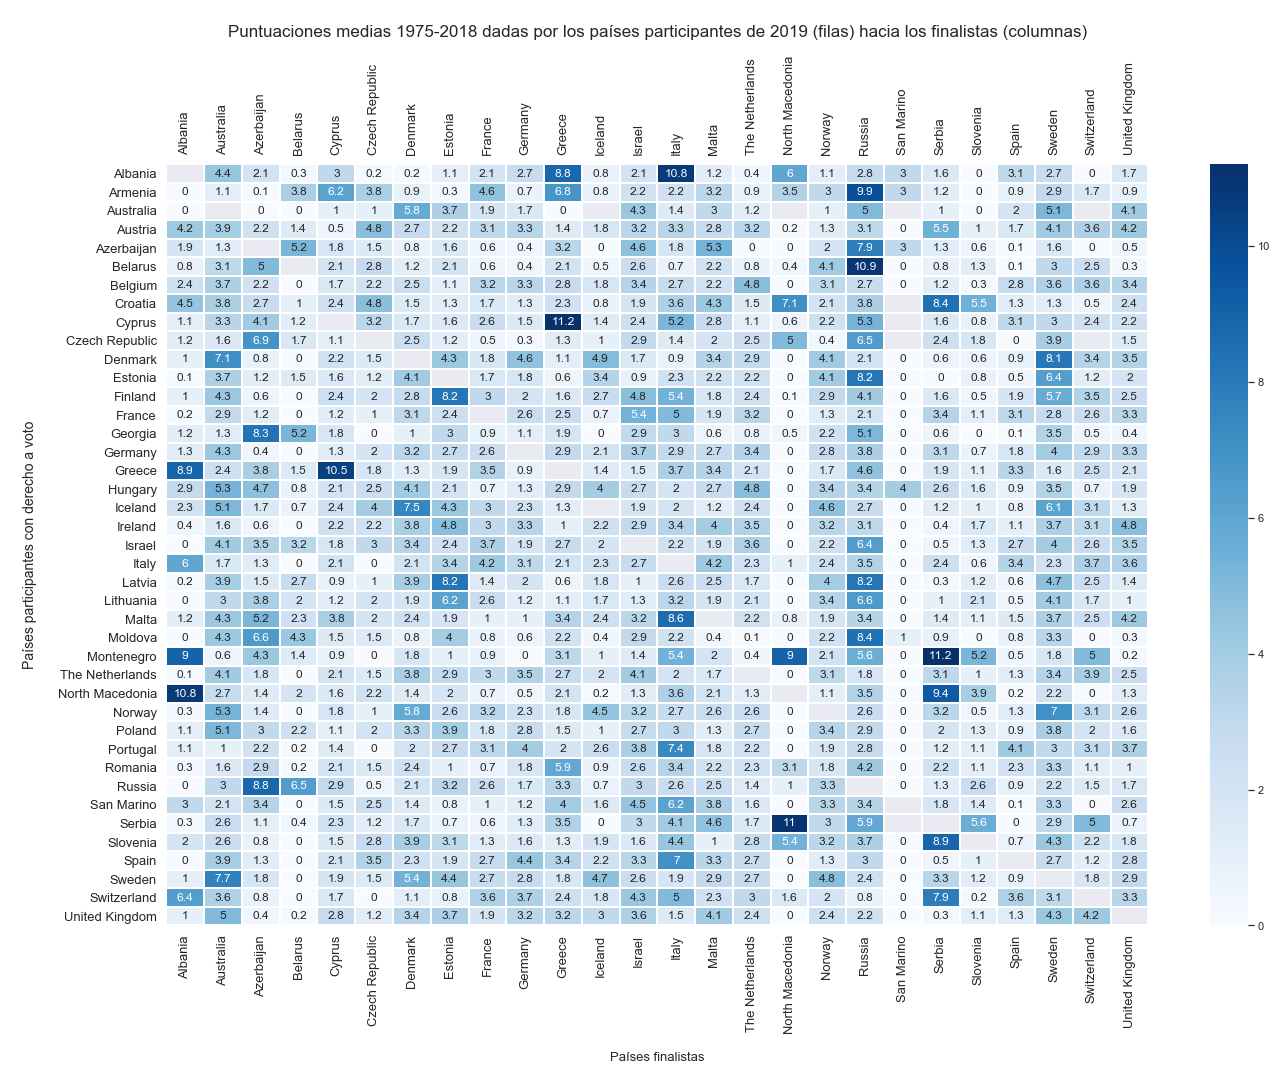

In [22]:
plot_matrix(voting_matrix_2019, 'Puntuaciones medias 1975-2018') 

## Matriz con televoto obligatorio (2001-2018)

Desde 2001 todos los países están obligados a usar el televoto salvo por problemas técnicos o de causa mayor. De todas formas, el sistema ha ido variando a lo largo de los años.

In [23]:
voting_matrix_xxi = voting_query('to_country == @to_country and year > 2000 and round == "f"')

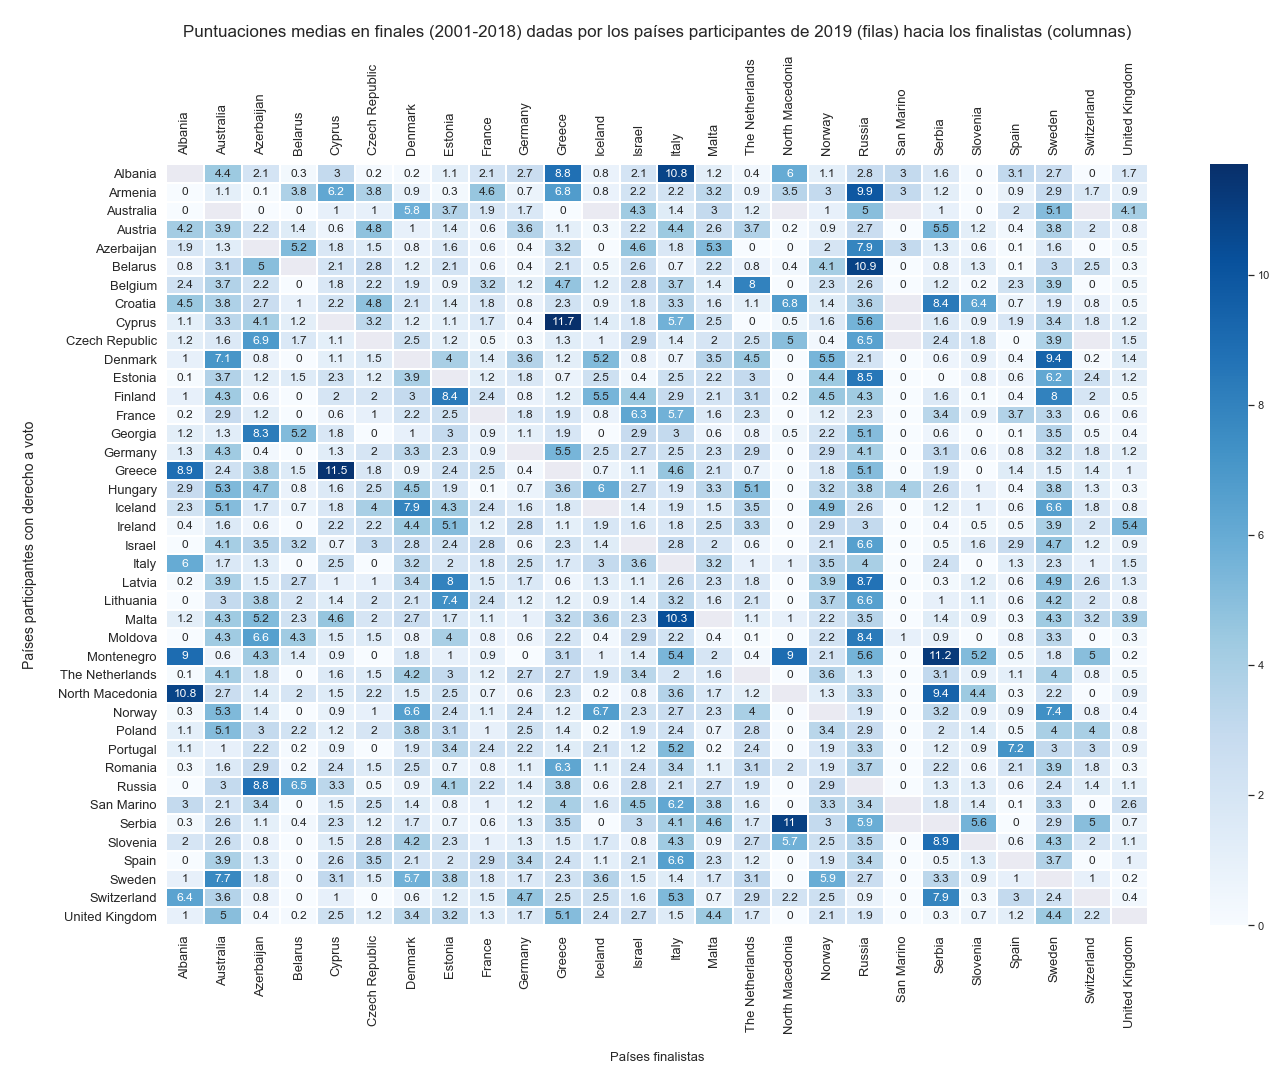

In [24]:
plot_matrix(voting_matrix_xxi, 'Puntuaciones medias en finales (2001-2018)')

## Matriz con voto exclusivo del público (2016 - 2018)

Desde 2016 el voto del público se suma al voto del jurado por separado. Resulta interesante verlo aparte; sobre todo porque desde que se instauró este sistema, las conexiones con los distintos países son sólo para conocer estas puntuaciones (las del jurado se computan todas previamente). Aún así no existen datos suficientes como para sacar conclusiones con esta matriz. Lo más interesante podría ser compararla con la equivalente para el voto exclusivo del jurado, para ver cómo difieren. También podríamos ver cuál de los dos está más sesgado por cercanía, idioma, o inmigración.

In [25]:
voting_matrix_t = voting_query('to_country == @to_country and voters < "T" and round == "f"')

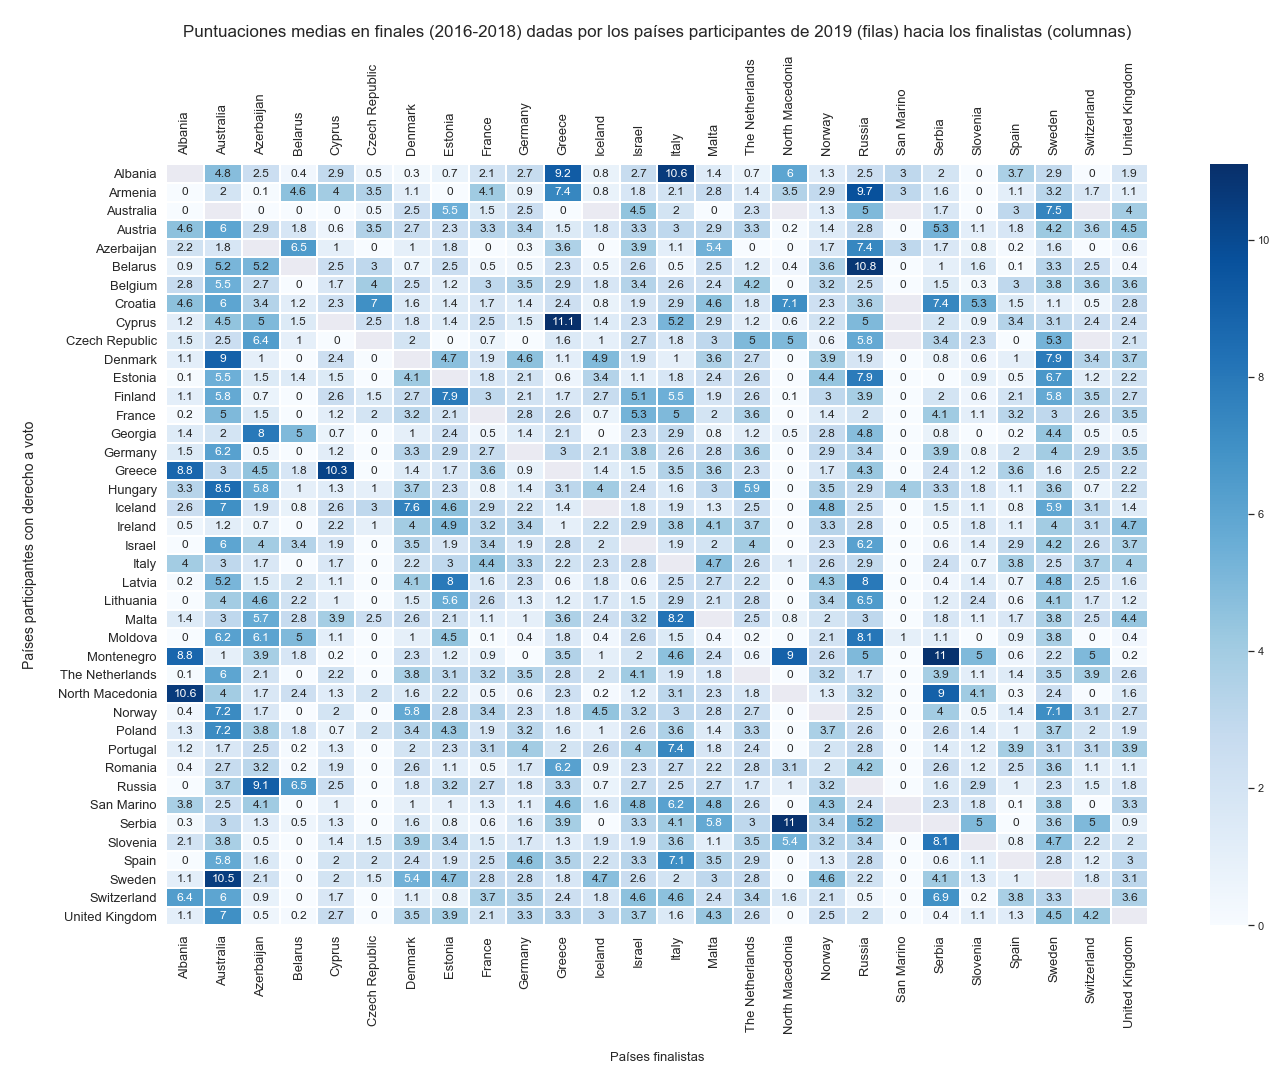

In [26]:
plot_matrix(voting_matrix_t, 'Puntuaciones medias en finales (2016-2018)')

# Metajuego

Siempre se ha hablado de que en Eurovisión existe mucho *metajuego*; el voto de los países no sólo refleja lo buena que es una canción y lo bien que se interpreta; aparte de esto hay otras cosas: 
* *Los votos de determinados países tienden a favorecer a sus vecinos*. Por ejemplo, España cruza los dedos para que Andorra vuelva al Festival, y quizá Rusia está pensando desprenderse de algunas tierras para obtener más votos.
* *El televoto favorece a los países con muchos emigrados en otros países de Europa*. Desde España siempre se vota muy bien a Rumanía, aunque tú no lo entiendas.
* *Acontecimientos políticos afectan a las votaciones*. Hace sólo 3 años hubo una polémica que parece que influyó decisivamente en la victoria de Ucrania.

**¿Y si pudiéramos plasmar las relaciones entre el voto de los países de forma visual?**

Para empezar vamos a crear el dataframe sin tener en cuenta qué países han quedado finalistas. Asignaremos un 12 como la puntuación que se daría cada país a sí mismo en caso de poder. 

Sería interesante tener por separado el voto del público y el del jurado, pero como sólo lo tenemos para 3 ediciones, vamos a computar las ediciones desde 2001:

In [27]:
voting_matrix_all_xxi = voting_query('to_country == @to_country and round == "f"', 
                                     own=12, target=countries_2019)

Vamos a sustituir los NaN por la media de cada columna:

In [28]:
voting_matrix_all_xxi.fillna(voting_matrix_all_xxi.mean(), inplace=True)

Pintamos la matriz:

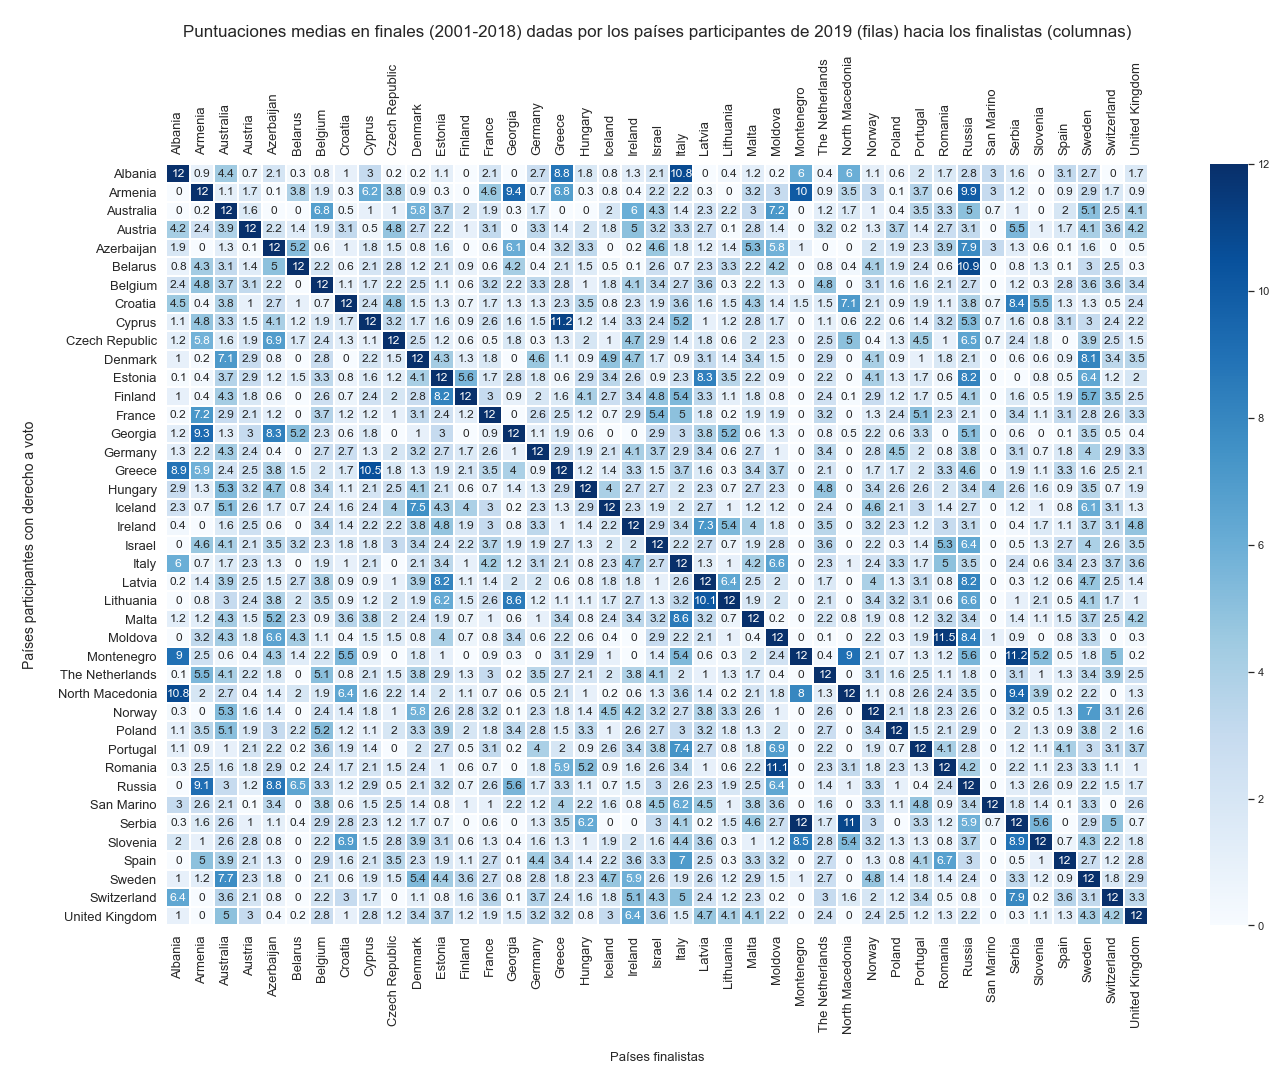

In [29]:
plot_matrix(voting_matrix_all_xxi, 'Puntuaciones medias en finales (2001-2018)')

Vamos a intentar agrupar los países mediante un `dendrograma` para visualizar las similitudes en la forma de repartir los votos:

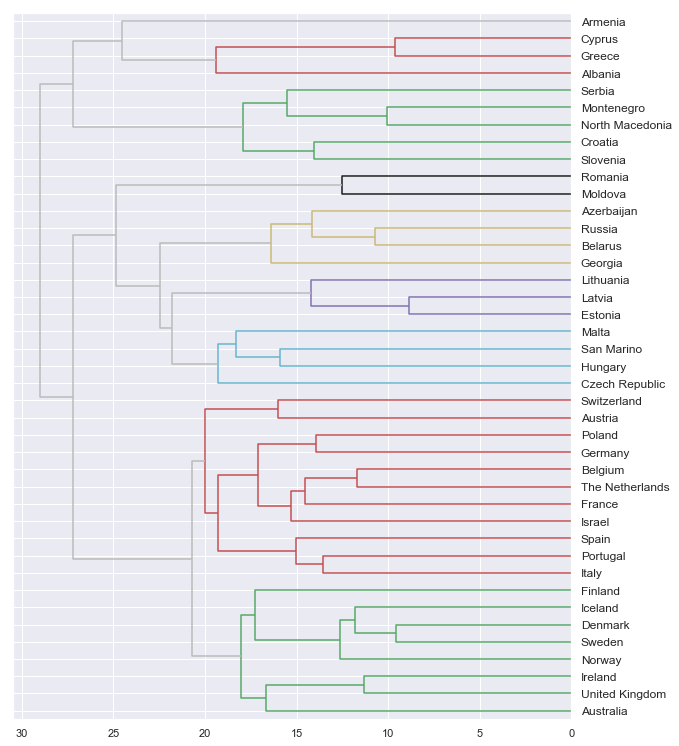

In [30]:
linkages = hc.linkage(voting_matrix_all_xxi, method='complete', optimal_ordering=True)

fig = plt.figure(figsize=(10,13))
hc.dendrogram(linkages, labels=countries_2019, orientation='left',
              above_threshold_color='#bbbbbb', leaf_font_size=12)
plt.show();

De forma sencilla hemos plasmado estas relaciones; algunas ya las intuíamos, y otras igual no tanto. Podemos diferenciar claramente varios bloques de países *afines*. Lo que hay que tener en cuenta de esta representación es que la agrupación se realiza por similitud en los votos emitidos; no por los votos que se emiten entre ellos (algo que podemos ver en la tabla anterior).

**K-Means?**

## Quien tiene un vecino tiene un tesoro
**¿De verdad que los vecinos son importantes?** Si no lo crees, pregúntaselo a Australia (sobre todo en 2017):

In [31]:
df.query('to_country == "Australia" and round == "f" and year > 2015') \
    .groupby(['year', 'voters'])['points'].sum()

year  voters
2016  J         320
      T         191
2017  J         171
      T           2
2018  J          90
      T           9
Name: points, dtype: int64

## El efecto diáspora

Comparación más votado vs más inmigrantes :) (Sólo televoto)